In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# setting data_path & Input training data
dir_data = 'C:/Users/IRIS168'
f_train = os.path.join(dir_data, 'pml-training.csv')
print('Path of read in data: %s' % (f_train))
train = pd.read_csv(f_train)
train.shape

Path of read in data: C:/Users/IRIS168\pml-training.csv


C:\Users\IRIS168\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(19622, 160)

In [3]:
# setting data_path & Input testing data
f_test = os.path.join(dir_data, 'pml-testing.csv')
print('Path of read in data: %s' % (f_test))
test = pd.read_csv(f_test)
test.shape

Path of read in data: C:/Users/IRIS168\pml-testing.csv


(20, 160)

In [4]:
train.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [5]:
train_delete = train.dropna(axis = 1)

In [6]:
train_delete.shape

(19622, 60)

In [7]:
train_delete['magnet_forearm_x'].describe()

count    19622.000000
mean      -312.575884
std        346.958482
min      -1280.000000
25%       -616.000000
50%       -378.000000
75%        -73.000000
max        672.000000
Name: magnet_forearm_x, dtype: float64

In [8]:
train_delete['magnet_forearm_y'].describe()

count    19622.000000
mean       380.116445
std        509.373742
min       -896.000000
25%          2.000000
50%        591.000000
75%        737.000000
max       1480.000000
Name: magnet_forearm_y, dtype: float64

In [9]:
train_delete['magnet_forearm_z'].describe()

count    19622.000000
mean       393.613745
std        369.268747
min       -973.000000
25%        191.000000
50%        511.000000
75%        653.000000
max       1090.000000
Name: magnet_forearm_z, dtype: float64

In [19]:
# count class numbers
count = train["classe"].value_counts().values
count

array([5580, 3797, 3607, 3422, 3216], dtype=int64)

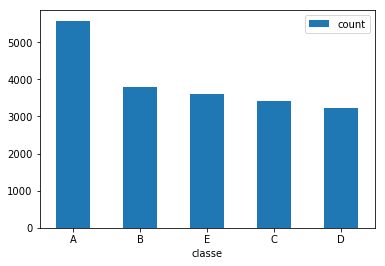

In [22]:
# plot bar diagram
df = pd.DataFrame({'classe':['A', 'B', 'E' , 'C' , 'D'], 'count':count})
ax = df.plot.bar(x='classe', y='count', rot=0)